# ANN网络训练过程

In [1]:
import os
import numpy as np
from Model import ANN
from matplotlib import pyplot as plt
import time

## 打开日志文件以便保存每次运行的参数设置

In [2]:
log = open('results.log', 'a+')

## 设置y=a·sin(b·x)+c·cos(d·x)中的a,b,c,d

In [3]:
a=2
b=2
c=2
d=1

## 定义生成真实标签y的函数

In [4]:
def genrate_actual_label(x):
#     noise = np.random.normal(0, 0.05, x.shape)
    return a * np.sin(b * x) + c * np.cos(d * x)

## 生成训练集和测试集

In [20]:
sample_domain = (-3*np.pi, 3 * np.pi)
sample_num = 1000
train_x = np.linspace(sample_domain[0], sample_domain[1], sample_num)
train_x = train_x.reshape(-1,1)
train_y = genrate_actual_label(train_x)
test_x = np.linspace(sample_domain[0], sample_domain[1], sample_num)
test_x = test_x.reshape(-1,1)
test_y = genrate_actual_label(test_x)

## 定义网络配置

In [26]:
network_structure = [1, 30, 30, 30, 1]
activation = 'tanh'
epochs = 199999
learning_rate = 0.003

## 初始化网络并开始训练

In [27]:
model = ANN(network_structure, activation_hidden=activation, activation_out='linear')
losses = model.fit(train_x, train_y, epochs=epochs,learning_rate=learning_rate)

epoch 199951: loss:0.024: : 203949it [00:19, 10324.48it/s]                          


## 画出loss曲线

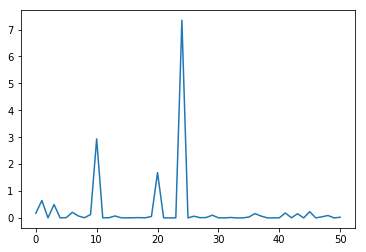

In [28]:
plt.plot(losses)
plt.show()

## 保存网络模型和参数

In [9]:
h5_filename = 'net-{}.h5'.format(time.time())
model.save(os.path.join('h5files',h5_filename))

## 用测试集进行预测

In [29]:
y_pred = model.predict(test_x)

## 画出真实y与预测y值,真实y用散点图画出,预测y用曲线表示,并保存该图片

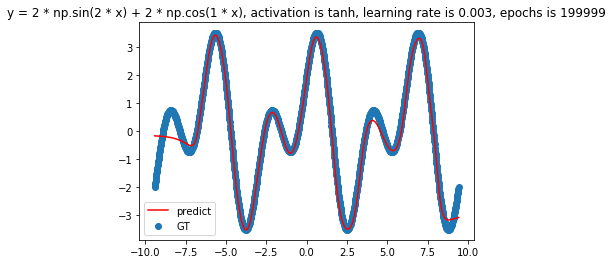

In [30]:
plt.title('y = {a} * np.sin({b} * x) + {c} * np.cos({d} * x), activation is {act}, learning rate is {lr}, epochs is {epochs}'.format(
    act=activation, lr=learning_rate, epochs=epochs, a=a, b=b, c=c, d=d))
plt.scatter(test_x, test_y, label='GT')
plt.plot(test_x, y_pred, color='red', label='predict')
plt.legend()
fig_filename = 'fig-{}.jpg'.format(time.time())
plt.savefig(os.path.join('figures', fig_filename))
plt.show()

## 记录本次运行的参数设置

In [12]:
log.write('function is : y = {a} * np.sin({b} * x) + {c} * np.cos({d} * x), sample domain: {domain}, sample num : {sample}, network structure is {net_struct}, activation is {act}, learning rate is {lr}, epochs is {epochs}, npy_filename is {h5_filename}, fig_filename is {fig_filename}\n'.format(
    domain=sample_domain, sample=sample_num, net_struct=network_structure, epochs=epochs, h5_filename=h5_filename, fig_filename=fig_filename, act=activation, lr=learning_rate, a=a,b=b,c=c,d=d))
log.close()